#Tarea 2

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

def calcular_angulos(lista_vectores, vector_a, angulo_limite):

    print(f"Vectores con ángulo > {angulo_limite} con respecto a {vector_a}:\n")

    for v_lista in lista_vectores:
        v = np.array(v_lista)

        producto_punto = np.dot(v, vector_a)

        norma_v = np.linalg.norm(v)
        norma_a = np.linalg.norm(vector_a)

        cos_theta = producto_punto / (norma_v * norma_a)

        angulo_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))
        angulo_grados = np.degrees(angulo_rad)


        if angulo_grados > angulo_limite:
            print(f"Vector: {v_lista}, Ángulo: {angulo_grados:}")

vectores = [[0, 1, 0], [1, 1, 0], [1, 2, 3], [-1, 0, 1], [0, 0, 1],
    [-1, 1, 0], [2, 1, 1], [3, 0.5, -1]]
a = np.array([1, 0, 0])
angulo_limite = 80

calcular_angulos(vectores, a, angulo_limite)

Vectores con ángulo > 80 con respecto a [1 0 0]:

Vector: [0, 1, 0], Ángulo: 90.0
Vector: [-1, 0, 1], Ángulo: 135.0
Vector: [0, 0, 1], Ángulo: 90.0
Vector: [-1, 1, 0], Ángulo: 135.0


#ejercicio 2

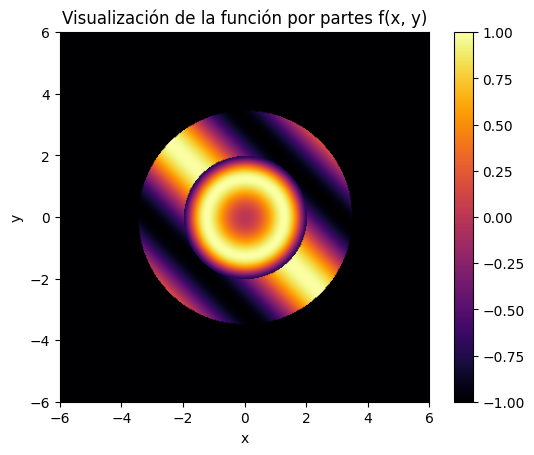

In [29]:
# Defino el dominio que va de -6 a 6
points = np.arange(-6, 6, 12/400) #con 200 puntos no hay resolucion buena
x, y = np.meshgrid(points, points)
r2 = x**2 + y**2

z = np.zeros_like(r2)

condicion1 = r2 <= 4
z[condicion1] = np.sin(r2[condicion1])

condicion2 = (r2 > 4) & (r2 < 12)
z[condicion2] = np.cos(x[condicion2] - y[condicion2])

condicion3 = r2 >= 12
z[condicion3] = -1.0


plt.imshow(z, extent=[-6, 6, -6, 6], cmap='inferno')
plt.colorbar()
plt.title("Visualización de la función por partes f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Ejericio 3

In [34]:
A = np.array([
    [2, -1, 3, 1, -1],
    [1, 2, -1, 2, 1],
    [3, -1, 1, -1, 2],
    [1, 1, 1, 1, 1],
    [-2, 4, 1, -3, 1]
])

b = np.array([7, 4, 10, 5, 0])

# We'll do it by Cramer's Rule
det_A = np.linalg.det(A)

if det_A == 0:
    print("The determinant is zero, Cramer's Rule cannot be applied.")
else:
    soluciones = []

    for i in range(5):
        A_temporal = A.copy()
        A_temporal[:, i] = b
        det_Ai = np.linalg.det(A_temporal)

        xi = det_Ai / det_A

        soluciones.append(xi)

    print("Solution:")

    for i, valor in enumerate(soluciones):
        print(f"x{i+1} = {valor:}")

Solution:
x1 = 3.0344827586206944
x2 = 1.0000000000000009
x3 = 0.8620689655172427
x4 = -0.2758620689655171
x5 = 0.3793103448275871


#Ejercicio 4

In [43]:
num_azar = np.random.normal(loc=10, scale=2, size=400)

sample_mean = np.mean(num_azar)

sample_std = np.std(num_azar)

sample_mean
sample_std

cuenta_numeros = np.sum((num_azar > 8) & (num_azar < 12))

print(f"Numero de valores entre el 8 y el 12: {cuenta_numeros}")

Numero de valores entre el 8 y el 12: 293


#Ejercicio 5

In [55]:
categorias = ['A', 'B', 'C']
probabilidades = [0.5, 0.3, 0.2]
sample = np.random.choice(categorias, size=200, p=probabilidades)

categorias_unicas, counts = np.unique(sample, return_counts=True)

conteo_categorias = dict(zip(categorias_unicas, counts))

print("Muestra Simulada (primeras 10 observaciones):")
print(sample[:10])

print("Ocurrencias de cada categoría:")
for categoria, count in conteo_categorias.items():
    print(f"Categoría '{categoria}': {count} veces")

Muestra Simulada (primeras 10 observaciones):
['A' 'A' 'C' 'B' 'C' 'A' 'A' 'C' 'A' 'A']
Ocurrencias de cada categoría:
Categoría 'A': 103 veces
Categoría 'B': 55 veces
Categoría 'C': 42 veces


#Ejercicioo 6

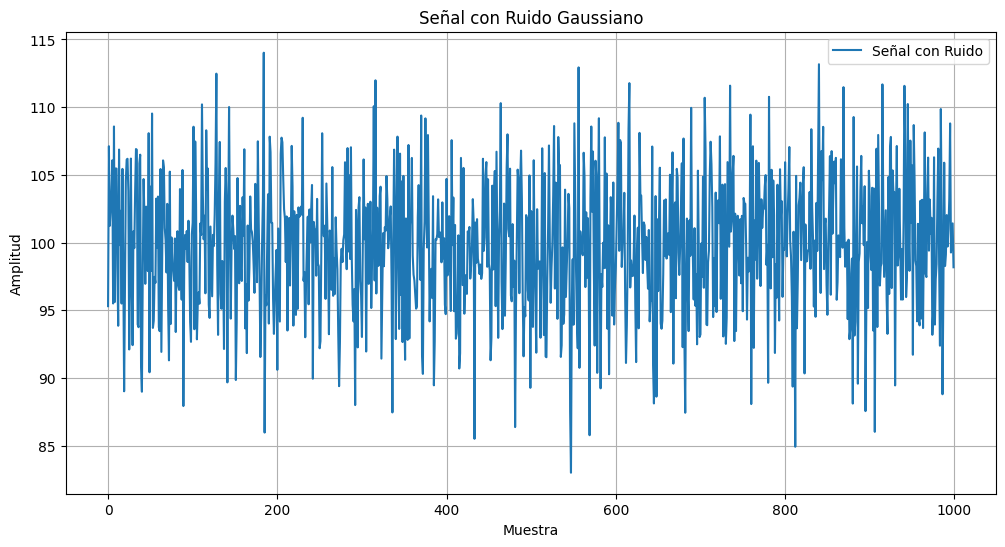

Error Medio Cuadrático (RMSE): 5.034449438227751


In [68]:
n = 1000
senal_base = np.full(n, 100)
ruido = np.random.normal(0, 5, n)
senal_ruidosa = senal_base + ruido

# Graficamos la señal ruidosa
plt.figure(figsize=(12, 6))
plt.plot(senal_ruidosa, label='Señal con Ruido')
plt.title('Señal con Ruido Gaussiano')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el Error Medio Cuadrático (RMSE)
rmse = np.sqrt(np.mean((senal_base - senal_ruidosa)**2))
print(f"Error Medio Cuadrático (RMSE): {rmse}")

#Ejercicio 7

In [72]:
cadenas = ['  juan*perez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis* #MORA%%', 'carla!!méndóza ',
    'PEDRO?ROSALES###', 'sofia*#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández  ',
    ' camila#RUIZ', 'marco*antonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!',
    'DANIEL* #Martinez', '  andrés#s@las', '*pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?',
    'Nicolás*rodríguez', ' carmen?LUNA:', 'Rosa#*AVILA', 'oscar?*pineda;', 'alejandra!ríos+',
    'IGNACIO#HERRERA  ', ' sergio*MENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ',
    'cristina*FLORES@', ' arturo#valdez;', 'LAURA*méndez', 'mariana?*ibarra!', ' esteban#quiroz ',
    'valeria!CASTILLO', 'renata#DE la cruz', 'fernando*?Vega:', 'irma!ZAPATA%', 'francisco#romero ',
    'alicia*Lara=', 'liliana#MENDEZ&', 'matías*#galván;', '#ricardo!Ríos', ' catalina*ALVARADO%',
    'gustavo!morales+', 'natalia#VILLARREAL:', 'andréa*páez;', '  Ramón*salinas!', ' david#molina ']


cadenas_limpias = [re.sub(r'[^a-zA-Z\s]', '', s).strip().title() for s in cadenas]
etiquetas = [f'id_{i:03}' for i in range(1, 51)]


series_nombres = pd.Series(cadenas_limpias, index=etiquetas)

series_nombres

,0
id_001,Juanperez
id_002,Analopez
id_003,Mriogomez
id_004,Luis Mora
id_005,Carlamndza
id_006,Pedrorosales
id_007,Sofiacano
id_008,Migueltorres
id_009,Lucia Ramirez
id_010,Josfernndez


In [73]:
print(series_nombres)

id_001            Juanperez
id_002             Analopez
id_003            Mriogomez
id_004            Luis Mora
id_005           Carlamndza
id_006         Pedrorosales
id_007            Sofiacano
id_008         Migueltorres
id_009        Lucia Ramirez
id_010          Josfernndez
id_011           Camilaruiz
id_012         Marcoantonio
id_013          Isabelgarza
id_014       Roberto Flores
id_015          Emiliareyes
id_016      Daniel Martinez
id_017            Andrsslas
id_018           Pablo Toro
id_019          Yesenialpez
id_020         Elenamorales
id_021       Nicolsrodrguez
id_022           Carmenluna
id_023            Rosaavila
id_024          Oscarpineda
id_025         Alejandraros
id_026       Ignacioherrera
id_027        Sergiomendoza
id_028           Tomsramrez
id_029         Andreamoreno
id_030          Manuel Ortz
id_031       Cristinaflores
id_032         Arturovaldez
id_033           Lauramndez
id_034        Marianaibarra
id_035        Estebanquiroz
id_036      Valeriac